In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
import os

for dirpath, dirnames, filenames in os.walk("casting_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'casting_data'.
There are 2 directories and 0 images in 'casting_data\test'.
There are 0 directories and 453 images in 'casting_data\test\def_front'.
There are 0 directories and 262 images in 'casting_data\test\ok_front'.
There are 2 directories and 0 images in 'casting_data\train'.
There are 0 directories and 3758 images in 'casting_data\train\def_front'.
There are 0 directories and 2875 images in 'casting_data\train\ok_front'.


In [4]:
train_dir = "casting_data/train/"
test_dir = "casting_data/test/"

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(target_dir + random_image[0])
    return img

### PLOTTING RANDOM IMAGES

casting_data/train/cast_def_0_1302.jpeg


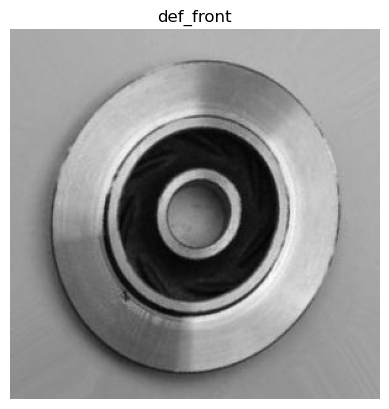

In [18]:
img = view_random_image(train_dir,class_names[0])

casting_data/train/cast_ok_0_711.jpeg


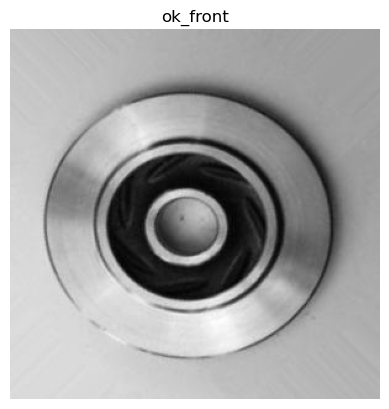

In [19]:
img = view_random_image(train_dir,class_names[1])

In [20]:
img.shape

(300, 300, 3)

casting_data/train/cast_def_0_2744.jpeg


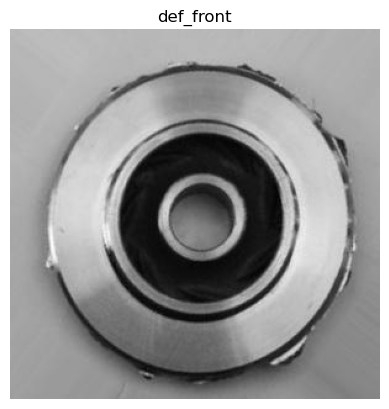

In [21]:
img = view_random_image(train_dir,class_names[0])

casting_data/test/cast_def_0_534.jpeg


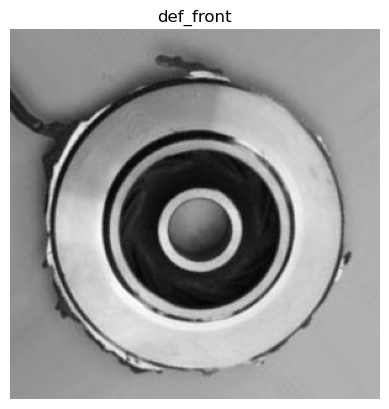

In [22]:
img = view_random_image(test_dir,class_names[0])

casting_data/test/cast_ok_0_5567.jpeg


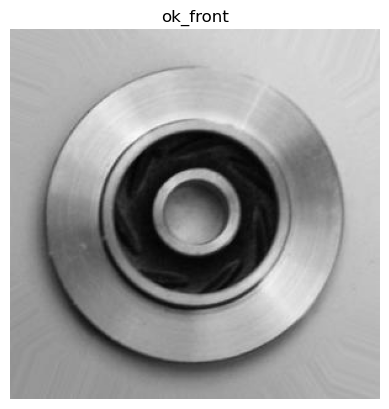

In [23]:
img = view_random_image(test_dir,class_names[1])

### Preprocessing the data

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [52]:
train_data_2 = train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(300,300),class_mode="binary",seed=42)
valid_data_2 = valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(300,300),class_mode="binary",seed=42)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [42]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['def_front' 'ok_front']


In [43]:
classnames[0] = "Defective"
classnames[1] = "OK"
classnames,class_names

(['Defective', 'OK'], array(['def_front', 'ok_front'], dtype='<U9'))

In [44]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, 
                                            save_best_only=True)

## MODEL BUILDING

### MODEL 1

In [46]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=['accuracy'])

history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
208/208 [==============================] - 192s 915ms/step - loss: 0.4986 - accuracy: 0.7449 - val_loss: 0.2553 - val_accuracy: 0.9119
Epoch 2/5
208/208 [==============================] - 183s 881ms/step - loss: 0.2263 - accuracy: 0.9195 - val_loss: 0.2617 - val_accuracy: 0.8531
Epoch 3/5
208/208 [==============================] - 183s 881ms/step - loss: 0.1438 - accuracy: 0.9536 - val_loss: 0.1101 - val_accuracy: 0.9608
Epoch 4/5
208/208 [==============================] - 182s 873ms/step - loss: 0.0892 - accuracy: 0.9723 - val_loss: 0.0623 - val_accuracy: 0.9748
Epoch 5/5
208/208 [==============================] - 184s 886ms/step - loss: 0.0715 - accuracy: 0.9795 - val_loss: 0.0477 - val_accuracy: 0.9804


In [49]:
model_1.evaluate(valid_data)

23/23 [==============================] - 3s 143ms/step - loss: 0.0477 - accuracy: 0.9804


[0.04774031043052673, 0.9804195761680603]

<Axes: >

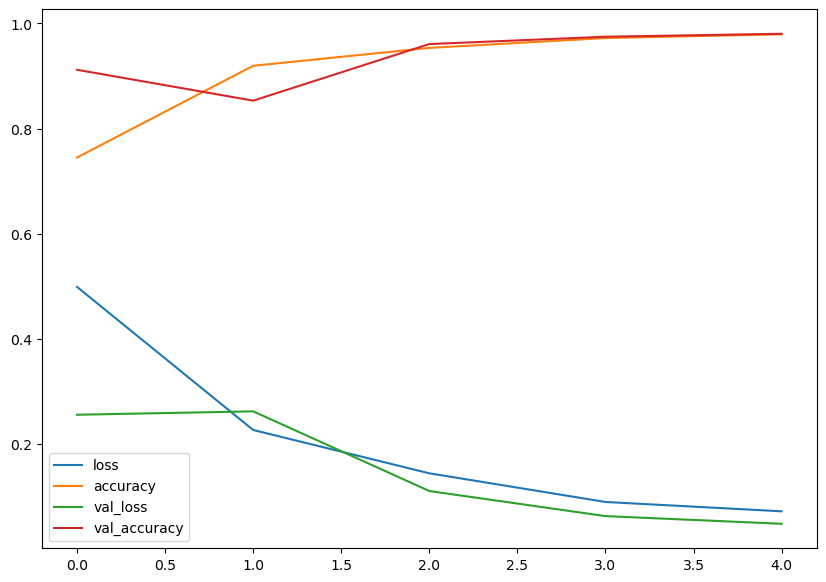

In [50]:
pd.DataFrame(history_1.history).plot(figsize=(10,7))

### MODEL 2 
Same as model 1 with different data preprocessing

In [54]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(300,300,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name = "model_2")

model_2.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=['accuracy'])

history_2 = model_2.fit(train_data_2,epochs=5,steps_per_epoch=len(train_data_2),validation_data=valid_data_2,validation_steps=len(valid_data_2),
                        callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/5
208/208 [==============================] - ETA: 0s - loss: 0.5163 - accuracy: 0.7375INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


208/208 [==============================] - 316s 2s/step - loss: 0.5163 - accuracy: 0.7375 - val_loss: 0.3243 - val_accuracy: 0.8629
Epoch 2/5
208/208 [==============================] - ETA: 0s - loss: 0.2793 - accuracy: 0.8810INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


208/208 [==============================] - 301s 1s/step - loss: 0.2793 - accuracy: 0.8810 - val_loss: 0.1750 - val_accuracy: 0.9441
Epoch 3/5
208/208 [==============================] - ETA: 0s - loss: 0.1616 - accuracy: 0.9420INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


208/208 [==============================] - 304s 1s/step - loss: 0.1616 - accuracy: 0.9420 - val_loss: 0.0834 - val_accuracy: 0.9720
Epoch 4/5
208/208 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 0.9741INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


208/208 [==============================] - 301s 1s/step - loss: 0.0904 - accuracy: 0.9741 - val_loss: 0.0653 - val_accuracy: 0.9748
Epoch 5/5
208/208 [==============================] - ETA: 0s - loss: 0.0715 - accuracy: 0.9763INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


208/208 [==============================] - 300s 1s/step - loss: 0.0715 - accuracy: 0.9763 - val_loss: 0.0559 - val_accuracy: 0.9804


In [56]:
model_2.evaluate(valid_data_2)

23/23 [==============================] - 6s 261ms/step - loss: 0.0559 - accuracy: 0.9804


[0.05594523623585701, 0.9804195761680603]

<Axes: >

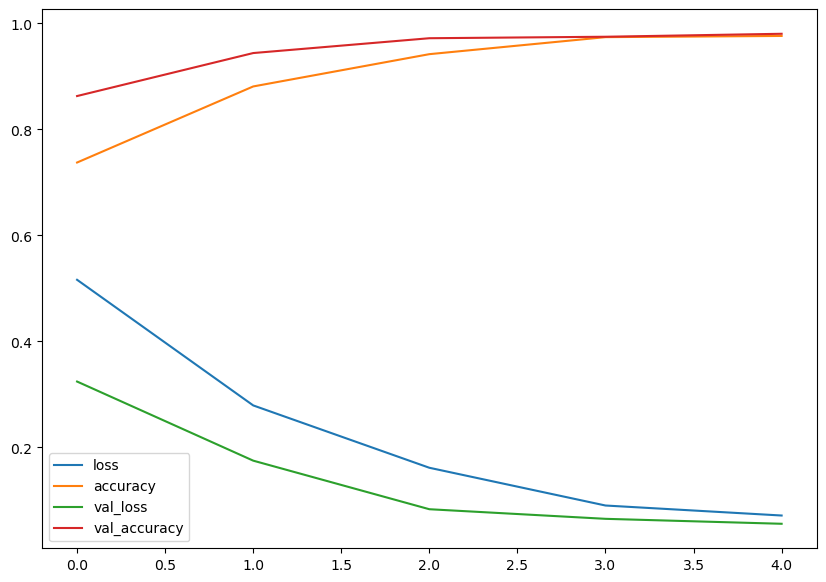

In [57]:
pd.DataFrame(history_2.history).plot(figsize=(10,7))

In [59]:
model_2 = tf.keras.models.load_model("model_experiments/model_2/")
model_2.evaluate(valid_data_2)

23/23 [==============================] - 6s 258ms/step - loss: 0.0559 - accuracy: 0.9804


[0.05594522878527641, 0.9804195761680603]

### MODEL 3
modified model 1

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2,padding="valid"),
  Conv2D(20, 3, activation='relu'),
  Conv2D(25, 3, activation='relu'),
  MaxPool2D(pool_size=2,padding="valid"),
  Conv2D(25, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation='sigmoid') 
], name="model_3")

# Compile the model
model_3.compile(loss="binary_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
           callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/15
208/208 [==============================] - ETA: 0s - loss: 0.5210 - accuracy: 0.7357INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 130s 621ms/step - loss: 0.5210 - accuracy: 0.7357 - val_loss: 0.2933 - val_accuracy: 0.8699
Epoch 2/15
208/208 [==============================] - ETA: 0s - loss: 0.2256 - accuracy: 0.9094INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 129s 621ms/step - loss: 0.2256 - accuracy: 0.9094 - val_loss: 0.1417 - val_accuracy: 0.9524
Epoch 3/15
208/208 [==============================] - 144s 693ms/step - loss: 0.1190 - accuracy: 0.9638 - val_loss: 0.1912 - val_accuracy: 0.9077
Epoch 4/15
208/208 [==============================] - ETA: 0s - loss: 0.0991 - accuracy: 0.9685INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 134s 646ms/step - loss: 0.0991 - accuracy: 0.9685 - val_loss: 0.0615 - val_accuracy: 0.9790
Epoch 5/15
208/208 [==============================] - ETA: 0s - loss: 0.0594 - accuracy: 0.9834INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 135s 647ms/step - loss: 0.0594 - accuracy: 0.9834 - val_loss: 0.0487 - val_accuracy: 0.9888
Epoch 6/15
208/208 [==============================] - ETA: 0s - loss: 0.0465 - accuracy: 0.9866INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 128s 615ms/step - loss: 0.0465 - accuracy: 0.9866 - val_loss: 0.0451 - val_accuracy: 0.9902
Epoch 7/15
208/208 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9863INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 128s 613ms/step - loss: 0.0424 - accuracy: 0.9863 - val_loss: 0.0373 - val_accuracy: 0.9916
Epoch 8/15
208/208 [==============================] - ETA: 0s - loss: 0.0398 - accuracy: 0.9870INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 128s 615ms/step - loss: 0.0398 - accuracy: 0.9870 - val_loss: 0.0339 - val_accuracy: 0.9860
Epoch 9/15
208/208 [==============================] - ETA: 0s - loss: 0.0278 - accuracy: 0.9914INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 128s 613ms/step - loss: 0.0278 - accuracy: 0.9914 - val_loss: 0.0247 - val_accuracy: 0.9888
Epoch 10/15
208/208 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9931INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 130s 624ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0218 - val_accuracy: 0.9930
Epoch 11/15
208/208 [==============================] - 128s 614ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.0855 - val_accuracy: 0.9720
Epoch 12/15
208/208 [==============================] - 128s 615ms/step - loss: 0.0357 - accuracy: 0.9897 - val_loss: 0.0303 - val_accuracy: 0.9902
Epoch 13/15
208/208 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 0.9919INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 133s 638ms/step - loss: 0.0214 - accuracy: 0.9919 - val_loss: 0.0203 - val_accuracy: 0.9958
Epoch 14/15
208/208 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9968INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


208/208 [==============================] - 132s 636ms/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0140 - val_accuracy: 0.9958
Epoch 15/15
208/208 [==============================] - 173s 833ms/step - loss: 0.0170 - accuracy: 0.9943 - val_loss: 0.0230 - val_accuracy: 0.9930


In [62]:
model_3.evaluate(valid_data)

23/23 [==============================] - 3s 116ms/step - loss: 0.0230 - accuracy: 0.9930


[0.023031122982501984, 0.9930070042610168]

<Axes: >

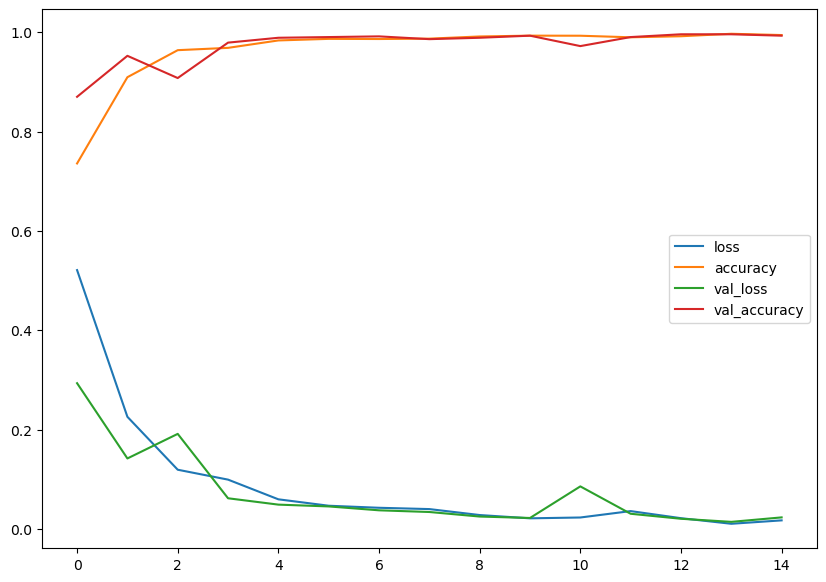

In [63]:
pd.DataFrame(history_3.history).plot(figsize=(10,7))

In [64]:
model_3 = tf.keras.models.load_model("model_experiments/model_3/")

In [66]:
model_3.evaluate(valid_data) 

23/23 [==============================] - 3s 116ms/step - loss: 0.0140 - accuracy: 0.9958


[0.014032898470759392, 0.9958041906356812]

In [68]:
#pd.crosstab(valid_data, model_3.predict(valid_data))

### MODEL 4

In [70]:
model_4 = Sequential([
  Conv2D(20, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2,padding="valid"),
  Conv2D(40, 3, activation='relu'),
  Conv2D(65, 3, activation='relu'),
  MaxPool2D(pool_size=3),
  Conv2D(15, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation='sigmoid') 
], name="model_4")

# Compile the model
model_4.compile(loss="binary_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
           callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/5
208/208 [==============================] - ETA: 0s - loss: 0.5554 - accuracy: 0.6924INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


208/208 [==============================] - 242s 1s/step - loss: 0.5554 - accuracy: 0.6924 - val_loss: 0.3386 - val_accuracy: 0.8503
Epoch 2/5
208/208 [==============================] - ETA: 0s - loss: 0.2506 - accuracy: 0.8936INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


208/208 [==============================] - 245s 1s/step - loss: 0.2506 - accuracy: 0.8936 - val_loss: 0.2546 - val_accuracy: 0.9035
Epoch 3/5
208/208 [==============================] - ETA: 0s - loss: 0.1412 - accuracy: 0.9510INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


208/208 [==============================] - 225s 1s/step - loss: 0.1412 - accuracy: 0.9510 - val_loss: 0.1052 - val_accuracy: 0.9734
Epoch 4/5
208/208 [==============================] - ETA: 0s - loss: 0.0761 - accuracy: 0.9766INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


208/208 [==============================] - 226s 1s/step - loss: 0.0761 - accuracy: 0.9766 - val_loss: 0.0651 - val_accuracy: 0.9790
Epoch 5/5
208/208 [==============================] - ETA: 0s - loss: 0.0674 - accuracy: 0.9825INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


208/208 [==============================] - 250s 1s/step - loss: 0.0674 - accuracy: 0.9825 - val_loss: 0.0348 - val_accuracy: 0.9888


In [71]:
model_4.evaluate(valid_data)

23/23 [==============================] - 5s 200ms/step - loss: 0.0348 - accuracy: 0.9888


[0.0348038487136364, 0.988811194896698]

<Axes: >

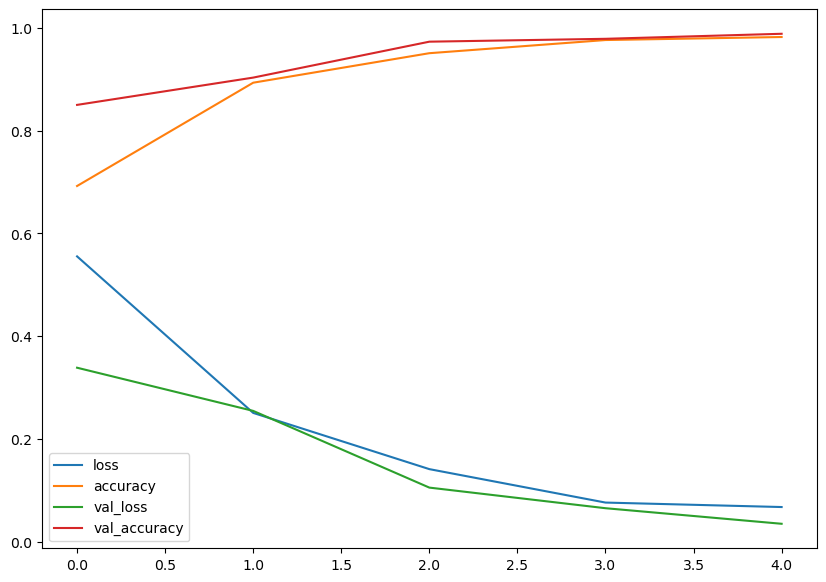

In [72]:
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [73]:
model_4 = tf.keras.models.load_model("model_experiments/model_4/")

In [74]:
model_4.evaluate(valid_data) 

23/23 [==============================] - 5s 197ms/step - loss: 0.0348 - accuracy: 0.9888


[0.0348038487136364, 0.988811194896698]

### MODEL 5
TRANSFER LEARNING USING VGG16 model

In [121]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

vgg = VGG16(include_top = False,input_shape = (224,224,3))

In [122]:
for layer in vgg.layers:
    print(layer)

In [123]:
for layer in vgg.layers:
    print(layer.trainable)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [124]:
i=0
for layer in vgg.layers:
    if i<=14:
        layer.trainable=False
    i+=1

In [125]:
for layer in vgg.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True


In [126]:
x= Flatten()(vgg.output)
output = Dense(1, activation ='softmax')(x)
model_5 = Model(vgg.input,output)
model_5_name = "model_5"

In [128]:
model_5.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics =['accuracy'])


history_5 = model_5.fit(train_data,
                        epochs=2,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
           callbacks=[create_model_checkpoint(model_name=model_5_name)])

Epoch 1/2
208/208 [==============================] - ETA: 0s - loss: 0.6853 - accuracy: 0.4334INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


208/208 [==============================] - 829s 4s/step - loss: 0.6853 - accuracy: 0.4334 - val_loss: 0.6712 - val_accuracy: 0.3664
Epoch 2/2
208/208 [==============================] - ETA: 0s - loss: 0.6846 - accuracy: 0.4334INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


208/208 [==============================] - 809s 4s/step - loss: 0.6846 - accuracy: 0.4334 - val_loss: 0.6690 - val_accuracy: 0.3664


In [129]:
model_5.evaluate(valid_data)

23/23 [==============================] - 58s 3s/step - loss: 0.6690 - accuracy: 0.3664


[0.6689502000808716, 0.3664335608482361]

<Axes: >

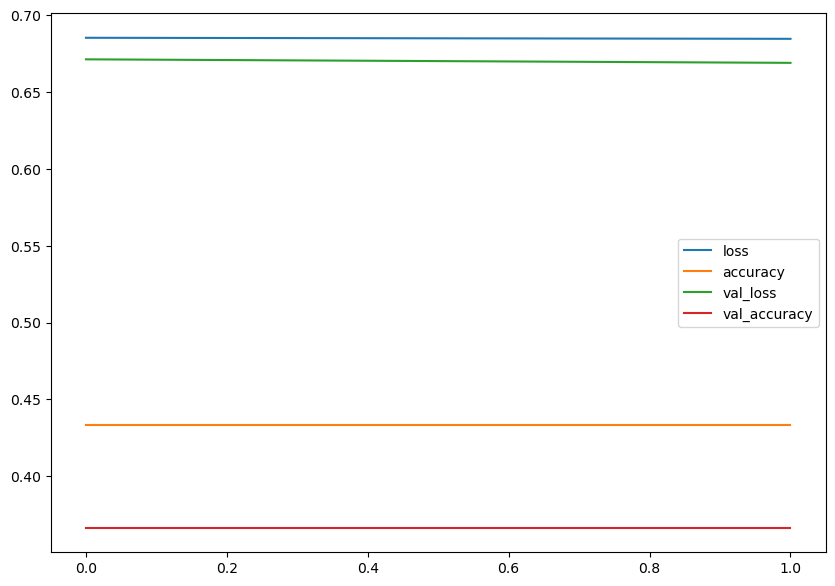

In [130]:
pd.DataFrame(history_5.history).plot(figsize=(10,7))

In [133]:
model_5 = tf.keras.models.load_model("model_experiments/model_5/")
model_5.evaluate(valid_data)[0]

23/23 [==============================] - 58s 3s/step - loss: 0.6690 - accuracy: 0.3664


0.6689502000808716

### Plotting accuracy for all 5 models

In [142]:
val = {"MODEL 1": model_1.evaluate(valid_data),
           "MODEL 2": model_2.evaluate(valid_data_2),
           "MODEL 3": model_3.evaluate(valid_data),
           "MODEL 4": model_4.evaluate(valid_data),
           "MODEL 5": model_5.evaluate(valid_data)}

23/23 [==============================] - 58s 2s/step - loss: 0.6690 - accuracy: 0.3664


In [154]:
vall = pd.DataFrame(val).T

In [155]:
vall.rename(columns = {0:'loss'}, inplace = True)
vall.rename(columns = {1:'accuracy'}, inplace = True)

In [156]:
vall

,loss,accuracy
MODEL 1,0.047740,0.980420
MODEL 2,0.055945,0.980420
MODEL 3,0.014033,0.995804
MODEL 4,0.034804,0.988811
MODEL 5,0.668950,0.366434


<Axes: >

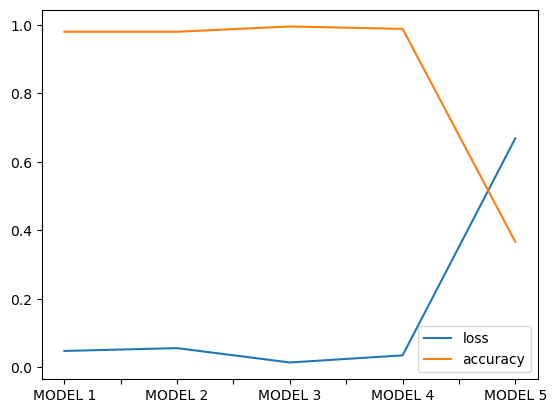

In [157]:
vall.plot()

## TESTING DATA

In [170]:
testing_dir = "casting_512x512/casting_512x512/"
testing_dir_2 = "casting_512x512/test/"
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(directory=testing_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
test_data_2 = test_datagen.flow_from_directory(directory=testing_dir_2,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 1040 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [164]:
# test = {"MODEL 1": model_1.evaluate(test_data),
#            "MODEL 2": model_2.evaluate(test_data_2),
#            "MODEL 3": model_3.evaluate(test_data),
#            "MODEL 4": model_4.evaluate(test_data),
#            "MODEL 5": model_5.evaluate(test_data)}

41/41 [==============================] - 106s 3s/step - loss: 0.6765 - accuracy: 0.3992


## model 3 training on test data

In [175]:
model_3_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2,padding="valid"),
  Conv2D(20, 3, activation='relu'),
  Conv2D(25, 3, activation='relu'),
  MaxPool2D(pool_size=2,padding="valid"),
  Conv2D(25, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation='sigmoid') 
], name="model_3_1")

# Compile the model
model_3_1.compile(loss="binary_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_3_1 = model_3_1.fit(test_data,
                        epochs=35,
                        steps_per_epoch=len(test_data),
                        validation_data=test_data_2,
                        validation_steps=len(test_data_2),
           callbacks=[create_model_checkpoint(model_name=model_3_1.name)])

Epoch 1/35
33/33 [==============================] - ETA: 0s - loss: 0.6639 - accuracy: 0.6135INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 26s 769ms/step - loss: 0.6639 - accuracy: 0.6135 - val_loss: 0.6454 - val_accuracy: 0.7423
Epoch 2/35
33/33 [==============================] - ETA: 0s - loss: 0.5773 - accuracy: 0.7038INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 24s 740ms/step - loss: 0.5773 - accuracy: 0.7038 - val_loss: 0.5644 - val_accuracy: 0.7115
Epoch 3/35
33/33 [==============================] - ETA: 0s - loss: 0.5360 - accuracy: 0.7269INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 25s 761ms/step - loss: 0.5360 - accuracy: 0.7269 - val_loss: 0.5350 - val_accuracy: 0.7923
Epoch 4/35
33/33 [==============================] - ETA: 0s - loss: 0.4785 - accuracy: 0.7750INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 25s 751ms/step - loss: 0.4785 - accuracy: 0.7750 - val_loss: 0.4865 - val_accuracy: 0.7692
Epoch 5/35
33/33 [==============================] - ETA: 0s - loss: 0.4399 - accuracy: 0.7885INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 24s 720ms/step - loss: 0.4399 - accuracy: 0.7885 - val_loss: 0.4337 - val_accuracy: 0.7885
Epoch 6/35
33/33 [==============================] - ETA: 0s - loss: 0.4048 - accuracy: 0.8192INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 25s 764ms/step - loss: 0.4048 - accuracy: 0.8192 - val_loss: 0.3951 - val_accuracy: 0.8231
Epoch 7/35
33/33 [==============================] - 22s 656ms/step - loss: 0.3764 - accuracy: 0.8317 - val_loss: 0.4019 - val_accuracy: 0.8192
Epoch 8/35
33/33 [==============================] - ETA: 0s - loss: 0.3219 - accuracy: 0.8519INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 24s 711ms/step - loss: 0.3219 - accuracy: 0.8519 - val_loss: 0.3209 - val_accuracy: 0.8731
Epoch 9/35
33/33 [==============================] - ETA: 0s - loss: 0.2662 - accuracy: 0.8817INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 23s 699ms/step - loss: 0.2662 - accuracy: 0.8817 - val_loss: 0.2778 - val_accuracy: 0.8846
Epoch 10/35
33/33 [==============================] - 22s 660ms/step - loss: 0.2821 - accuracy: 0.8769 - val_loss: 0.2893 - val_accuracy: 0.8769
Epoch 11/35
33/33 [==============================] - ETA: 0s - loss: 0.1940 - accuracy: 0.9106INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 24s 719ms/step - loss: 0.1940 - accuracy: 0.9106 - val_loss: 0.2330 - val_accuracy: 0.9038
Epoch 12/35
33/33 [==============================] - ETA: 0s - loss: 0.1482 - accuracy: 0.9452INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 23s 706ms/step - loss: 0.1482 - accuracy: 0.9452 - val_loss: 0.2056 - val_accuracy: 0.9231
Epoch 13/35
33/33 [==============================] - 22s 656ms/step - loss: 0.1456 - accuracy: 0.9442 - val_loss: 0.2643 - val_accuracy: 0.8885
Epoch 14/35
33/33 [==============================] - 22s 652ms/step - loss: 0.1355 - accuracy: 0.9500 - val_loss: 0.2893 - val_accuracy: 0.8769
Epoch 15/35
33/33 [==============================] - 22s 663ms/step - loss: 0.0960 - accuracy: 0.9673 - val_loss: 0.4192 - val_accuracy: 0.8308
Epoch 16/35
33/33 [==============================] - ETA: 0s - loss: 0.0894 - accuracy: 0.9702INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 24s 723ms/step - loss: 0.0894 - accuracy: 0.9702 - val_loss: 0.1683 - val_accuracy: 0.9231
Epoch 17/35
33/33 [==============================] - 22s 663ms/step - loss: 0.0648 - accuracy: 0.9808 - val_loss: 0.1884 - val_accuracy: 0.9269
Epoch 18/35
33/33 [==============================] - ETA: 0s - loss: 0.0572 - accuracy: 0.9798INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 23s 704ms/step - loss: 0.0572 - accuracy: 0.9798 - val_loss: 0.1353 - val_accuracy: 0.9385
Epoch 19/35
33/33 [==============================] - 22s 665ms/step - loss: 0.0547 - accuracy: 0.9817 - val_loss: 0.1662 - val_accuracy: 0.9346
Epoch 20/35
33/33 [==============================] - 22s 667ms/step - loss: 0.0458 - accuracy: 0.9904 - val_loss: 0.1631 - val_accuracy: 0.9423
Epoch 21/35
33/33 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.9885INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 23s 697ms/step - loss: 0.0313 - accuracy: 0.9885 - val_loss: 0.1234 - val_accuracy: 0.9538
Epoch 22/35
33/33 [==============================] - 22s 660ms/step - loss: 0.0140 - accuracy: 0.9971 - val_loss: 0.1831 - val_accuracy: 0.9500
Epoch 23/35
33/33 [==============================] - ETA: 0s - loss: 0.0145 - accuracy: 0.9962INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_3_1\assets


33/33 [==============================] - 23s 705ms/step - loss: 0.0145 - accuracy: 0.9962 - val_loss: 0.1201 - val_accuracy: 0.9577
Epoch 24/35
33/33 [==============================] - 22s 651ms/step - loss: 0.0210 - accuracy: 0.9923 - val_loss: 0.1444 - val_accuracy: 0.9500
Epoch 25/35
33/33 [==============================] - 22s 662ms/step - loss: 0.0078 - accuracy: 0.9990 - val_loss: 0.1461 - val_accuracy: 0.9615
Epoch 26/35
33/33 [==============================] - 22s 648ms/step - loss: 0.0101 - accuracy: 0.9971 - val_loss: 0.1247 - val_accuracy: 0.9538
Epoch 27/35
33/33 [==============================] - 22s 666ms/step - loss: 0.0788 - accuracy: 0.9692 - val_loss: 0.5015 - val_accuracy: 0.8731
Epoch 28/35
33/33 [==============================] - 24s 736ms/step - loss: 0.1613 - accuracy: 0.9404 - val_loss: 0.3123 - val_accuracy: 0.8923
Epoch 29/35
33/33 [==============================] - 22s 670ms/step - loss: 0.0528 - accuracy: 0.9808 - val_loss: 0.2188 - val_accuracy: 0.9308
Epoc

In [176]:
model_3_1.evaluate(test_data_2)

9/9 [==============================] - 1s 150ms/step - loss: 0.1799 - accuracy: 0.9423


[0.17993085086345673, 0.942307710647583]

In [177]:
model_3_1 = tf.keras.models.load_model("model_experiments/model_3_1/")
model_3_1.evaluate(test_data_2)

9/9 [==============================] - 2s 144ms/step - loss: 0.1201 - accuracy: 0.9577


[0.12014881521463394, 0.9576923251152039]

<Axes: >

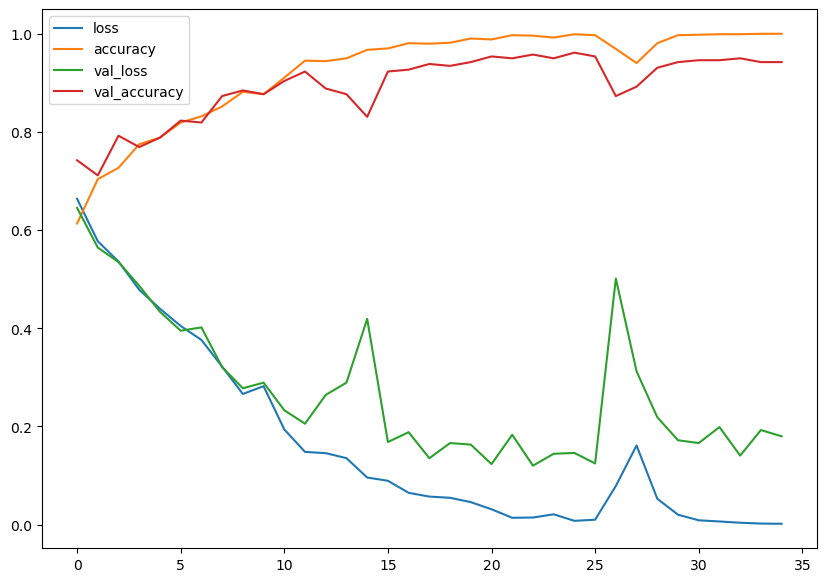

In [178]:
pd.DataFrame(history_3_1.history).plot(figsize=(10,7))

In [181]:
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    
    img=tf.image.decode_image(img)
    
    img=tf.image.resize(img,size=[img_shape,img_shape])
    
    img=img/255.
    return img

def pred_and_plot(model,filename,class_names=class_names):
    img = load_and_prep_image(filename)
    
    pred = model.predict(tf.expand_dims(img,axis=0))
    
    pred_class = class_names[int(tf.round(pred))]
    
    plt.imshow(img)
    plt.title(f"Prediction : {pred_class}\n accuracy : {pred}")
    plt.axis(False)

1/1 [==============================] - 0s 285ms/step


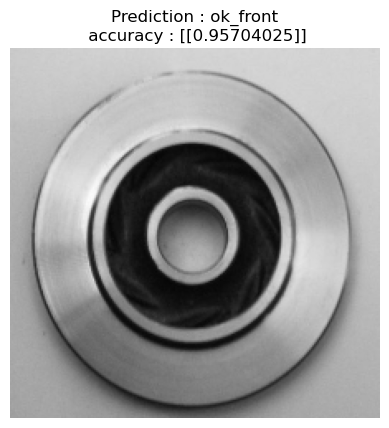

In [182]:
pred_and_plot(model_3_1,"cast_ok_0_9173.jpeg")

1/1 [==============================] - 0s 31ms/step


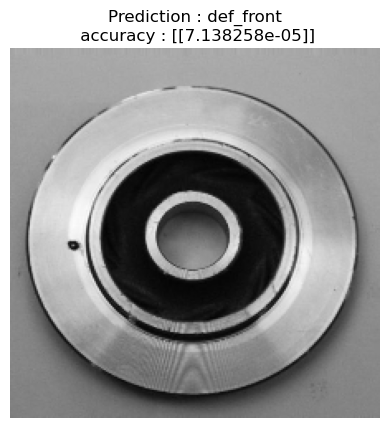

In [191]:
pred_and_plot(model_3_1,"cast_def_0_8844.jpeg")

1/1 [==============================] - 0s 38ms/step


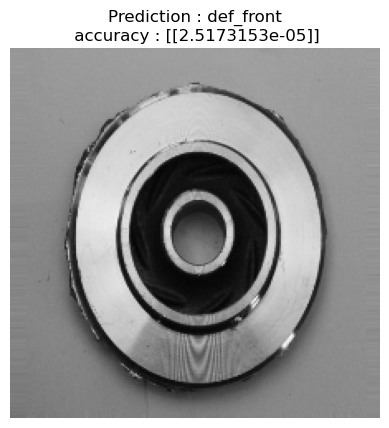

In [189]:
pred_and_plot(model_3_1,"cast_def_0_8220.jpeg")

1/1 [==============================] - 0s 31ms/step


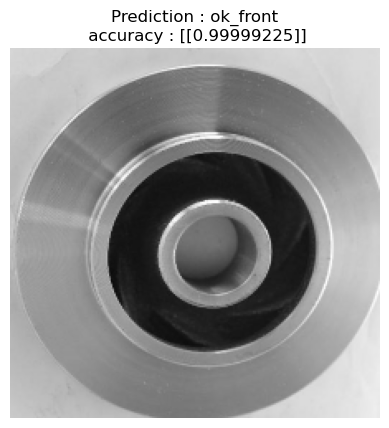

In [190]:
pred_and_plot(model_3_1,"cast_ok_0_8208.jpeg")

1/1 [==============================] - 0s 16ms/step


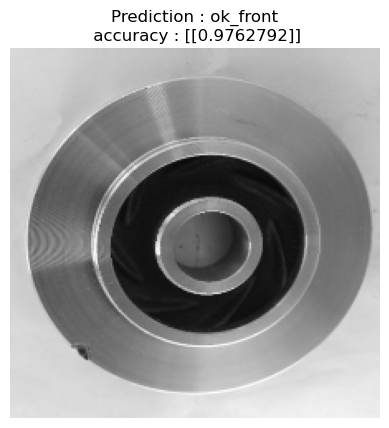

In [193]:
pred_and_plot(model_3_1,"cast_def_0_9854.jpeg")
# wrong prediction because not enough training pictures similar to this